# Building multiple linear regression model

## Introduction

This project will build a multiple linear regression model.
The goal is to:
- Build a multiple linear regression model to assess the direction and magnitude of relationship between `Sales`, one continueous dependent variable and two or more independent variable.
- Make predictions and decisions which source combination would be the best to increase total sales.

Before building and executing the linear regression model, basic EDA, data cleaning, and other manipulations will be conducted to prepare the data for modeling.

Modeling follows the steps:
1. Importing packages and loading data
2. Exploring the data and completing the cleaning process
3. Building a multiple linear regression model
4. Evaluating the linear regression model using stats and assumptions

### Step 1: Importing packages and loading data

#### 1.1. Import packages

Import relevant Python packages.

In [1]:
# Standard operational packages.
import pandas as pd

# Modeling and evaluation packages.
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Visualization packages.
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.2. Load the dataset

Load the `marketing_sales_data.csv` dataset. Save the data to `df`, a pandas `DataFrame` object.

In [2]:
path = '../../../data/'
df = pd.read_csv(path + 'marketing_sales_data.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
...,...,...,...,...,...
567,High,28.210738,4.373466,Micro,302.887998
568,Medium,23.578661,2.856657,Mega,232.555023
569,Low,9.169824,0.067279,Nano,73.888838
570,Low,11.563403,1.727947,Nano,121.949570


### Step 2: Exploring the data and completing the cleaning process

#### 2.1. Prepare the data

After loading the dataset, prepare the data to be suitable for a logistic regression model.
- Exploring the data
- Checking for missing values
- Encoding the data
- Split the `original` dataset into `train` and `test` dataset. 

#### 2.2. Explore the the data

Use functions to take a look at the data
- `shape`
- `info()`

In [3]:
df.shape

(572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [5]:
print('TV:\t\t', df['TV'].unique())
print('Influencer:\t', df['Influencer'].unique())

TV:		 ['Low' 'Medium' 'High' nan]
Influencer:	 ['Micro' 'Macro' 'Mega' 'Nano']


#### 2.3. Check for missing values

`statmodels` package for linear regression modeling does not support missing values. Check for missing values in the rows of the data.

In [6]:
df.isna().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

#### 2.4. Drop the rows with missing values
- There are `3` missing values in `TV`,`Radio` and `Sales` and they are a small percentage of the total, `572`.
- Assume that they might not impact the relation between `Sales` and/or media types such as `Radio`.
- Remind that the goal of this project is to predict the relation between 1 independent variable and 1 dependent variable.
- So, let's remove them.

In [7]:
print('before drop:\t', df.shape)
df = df.dropna(axis=0).reset_index(drop=True)
print('after drop:\t', df.shape)

before drop:	 (572, 5)
after drop:	 (569, 5)


#### 2.4. Check model assumptions
The focus of this project is to explore the relationship between sales and media type of the promotion.

Now check the data to be suitable for a linear regression model.

- Create a plot of pairwise relationships in the data

#### 2.5. Create a plot of pairwise relationships in the data

- Use `pairplot()` function of `Seaborn` package to visualize the relationships between two variables.

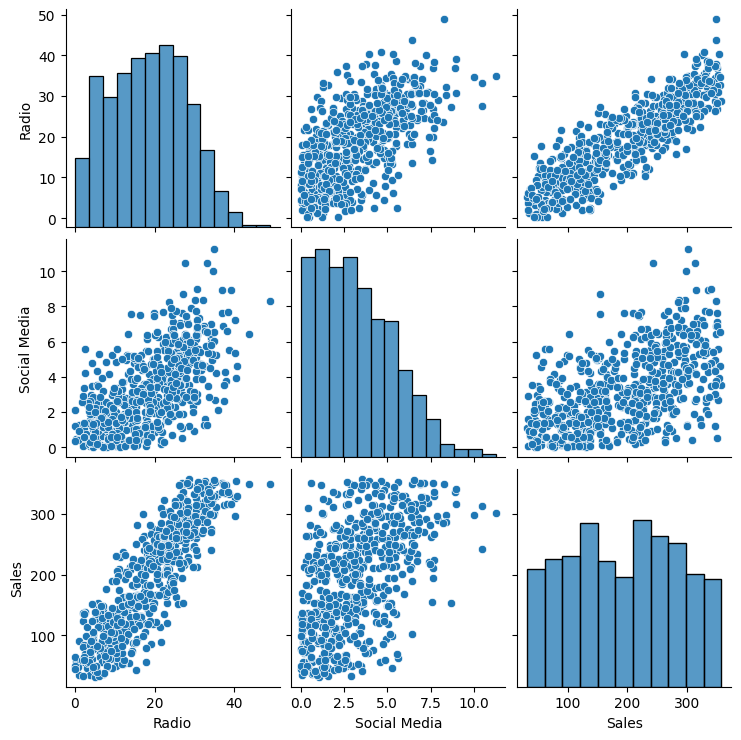

In [8]:
sns.pairplot(data=df)
plt.show()

#### 2.6. Review the scatter plot
- Both `Radio` and `Social Media` appear to cluster around a line that indicates a positive relationships with `Sales`, the dependent variable.
- Since the points cluster around a line, they seem the assumption of `Linearity` is met.

#### 2.7. Calculate the mean sales for each categorical variable

- `TV` and `Influencer`, the two numeric categorical variables can be calculated.
- Let's find the mean `Sales` for each category.

In [9]:
print(df.groupby(by='TV')['Sales'].mean())
print('')
print(df.groupby(by='Influencer')['Sales'].mean())

TV
High      300.529591
Low        91.716309
Medium    199.023461
Name: Sales, dtype: float64

Influencer
Macro    206.641805
Mega     180.385096
Micro    198.655080
Nano     189.742830
Name: Sales, dtype: float64


`TV` 
- `High` value is much higher than `Medium` and `Low`.
- It would be stronger source than `Influencer`.

`Influencer` 
- `Macro` value is a little higer than others.
- There is no big difference among them.
- It would be weaker source than `TV.`

### Step 3. Building a multiple linear regression model

#### 3.1. Select two or more columns that are needed for the model that you will build from the data.

- Unlike a single linear regression model, all columns can be used. So, just use `copy()` function to clone the `df` to `ols_data`.

In [10]:
ols_data = df.copy()

#### 3.2. Write the linear regression formula for modeling the relationship between the the interest variables.

- `TV` was selected, as the preceding analysis showed a strong relationship between the `TV` promotional budget and the average `Sales`.
- `Radio` was selected because the pairplot showed a strong linear relationship between `Radio` and `Sales`.
- `Social Media` was `NOT` selected because it did not increase model performance and it was later determined to be correlated with another independent variable: `Radio`.
- `Influencer` was `NOT` selected because it did not show a strong relationship to `Sales` in the preceding analysis.

In [11]:
ols_formula = 'Sales ~ C(TV) + Radio'

#### 3.3. Implement the Ordinary Least Squares (OLS) approach for linear regression.

In [12]:
OLS = ols(data=ols_data, formula=ols_formula)

#### 3.4. Create a linear regression model for the data and 

In [13]:
model = OLS.fit()

### Step 4: Evaluating the linear regression model using stats and assumptions

#### 4.1. Get a summary of the results from the model

- Use `summary()` function.

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          1.61e-287
Time:                        22:00:56   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4.2. Analyze the bottom table from the results summary

The coefficients (slopes) are:
- $\beta_{TVLow}$: `-152.0897`
- $\beta_{TVMedium}$: `-73.4835`
- $\beta_{Radio}$: `2.8864`
- The intercept is `217.6367`

From these values, the linear equation is
- `Sales` = -152.0897 * `TV`(Low) -73.4835 * `TV`(Medium) + 2.8864 * `Radio` + 217.6367

It implies that 
- The default `TV` category is `High`.
- The model predicts that `Medium` and `Low` category would have a negative impact on the average of `Sales` when `Radio` is the same.
- The model predicts that `High` category for `TV` would have a positve impact on the `Sales`.
- `Radio` is positive and has a positive impact on `Sales` by approximately 3.
- `p-value` are `0.000`, which means that all coefficients are statistically significant at `p=0.05`.
- The results show that this model performs well and the `95%` confidence intervals for each coefficient should be reported to stakeholders.
- If the organization spends promotional budgets in `High TV` and `Radio`, its `Sales` would increase.

#### 4.3. Check model assumptions

To verify whether the linear regression model would be a well built one, check the 4 basic model assumptions.
- `Linearity`: Each predictor variable (Xi) is linearly related to the outcome variable (Y).
- `Normality`: The errors are normally distributed.
- `Independent observations`: Each observation in the dataset is independent.
- `Homoscedasticity`: The variation of the errors is constant or similar across the model.

#### 4.4. Plot the OLS data with the best fit regression line

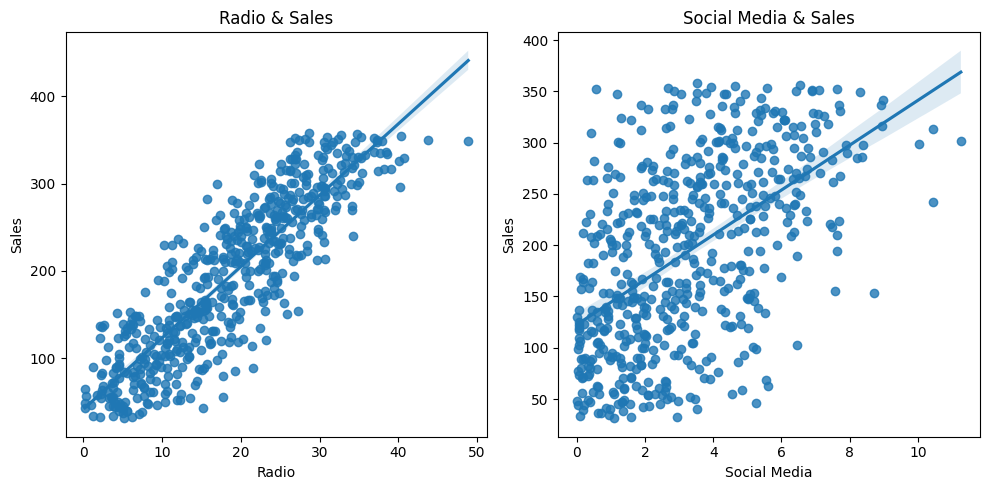

In [15]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
sns.regplot(ax=axs[0], data=ols_data, x='Radio', y='Sales')
sns.regplot(ax=axs[1], data=ols_data, x='Social Media', y='Sales')
axs[0].set_title('Radio & Sales')
axs[1].set_title('Social Media & Sales')
plt.tight_layout()
plt.show()

Observation

- The preceding regression plots illustrate an approximately linear relationships between the two variables along with the best fit line. This confirms the assumption of `Linearity`.

#### 4.5. Check the normality

- Get the residuals from the model.
- Visualize the distribution of the residuals.

In [16]:
# Get the residuals from the model.
residuals = model.resid
residuals

0      20.990621
1      35.437962
2       7.275269
3      34.202761
4      27.732253
         ...    
564     3.824883
565    20.345267
566   -18.125589
567    23.026402
568   -15.947912
Length: 569, dtype: float64

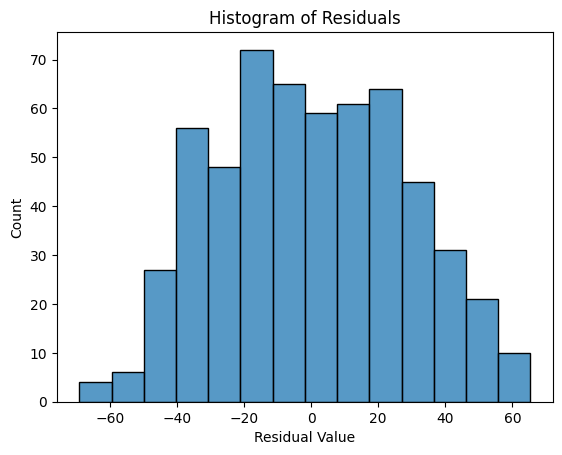

In [17]:
# Visualize the distribution of the residuals
fig = sns.histplot(residuals)
fig.set_xlabel('Residual Value')
fig.set_title('Histogram of Residuals')
plt.show()

Observation

- The histogram illustrates the distribution is approximately normal. This confirms the assumption of `Normality`.

#### 4.6. Create a Q-Q plot to confirm the normality

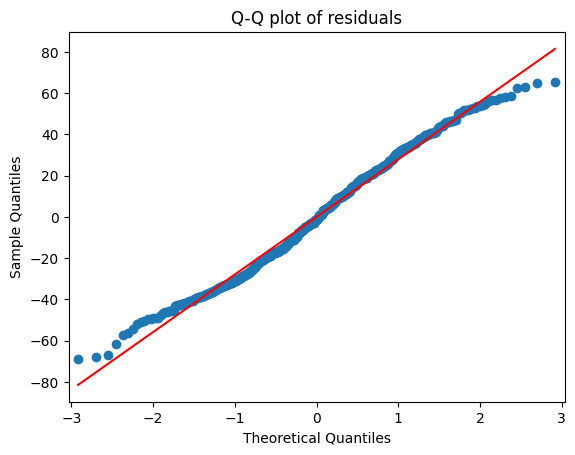

In [18]:
# Create a Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q plot of residuals')
plt.show()

Observation

- the plot shows that the variables closely follow a straight diagonal line trending upward. This confirms the assumption of `Normality`.

#### 4.7. Check the homoscedasticity

- Get the fitted values from the model.
- Create a scatter plot of `residuals` against the `fitted values`.

In [19]:
# Get the fitted values from the model
fitted_values = model.fittedvalues
fitted_values

0       69.063601
1      187.303706
2       95.499521
3      294.036617
4      324.075075
          ...    
564    299.063115
565    212.209756
566     92.014428
567     98.923167
568    198.459525
Length: 569, dtype: float64

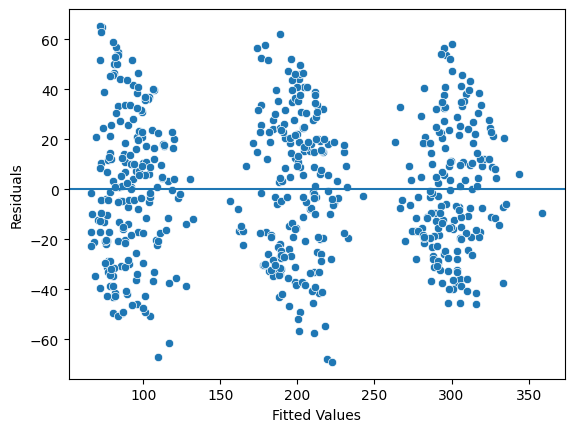

In [20]:
# Create a scatter plot of residuals against the fitted values
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel('Fitted Values')
fig.set_ylabel('Residuals')
plt.show()

Observation

- The plot illustrates the fitted values are in three groups because the categorical variable is dominating in this model, meaning that `TV` is the biggest factor that decides the sales.
- The values are similarly distributed and do not violate independent observation assumption.

So, this confirms the assumption of `Homoscedasticity` or `Constant Variance`.

#### 4.8. Check the multicollinearity

- Create a scatter plot to show the relationships among the independent variables.
- Use `VIF`, variance inflation factor to detect multicollinearity.

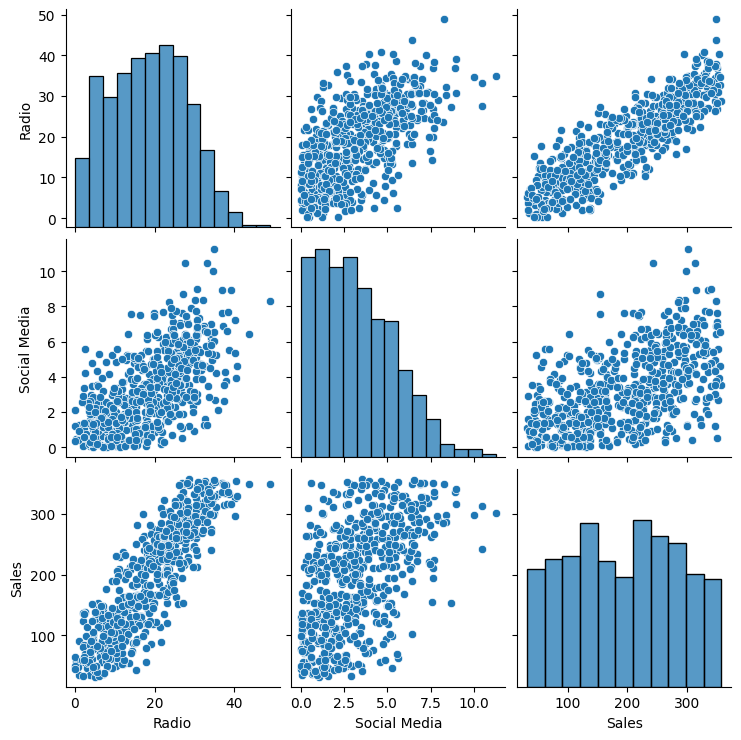

In [21]:
# Create a scatter plot
sns.pairplot(data=ols_data)
plt.show()

In [22]:
# Use VIF, variance inflation factor to detect multicollinearity.
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = ols_data[['Radio', 'Social Media']]

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns=['VIF'])
df_vif

,VIF
Radio,4.93238
Social Media,4.93238


Observation

- The single linear regression model only has one continous independent variable, meaning there are no multicollinearity issues. 

- If a model used both `Radio` and `Social_Media` as predictors, there would be a moderate linear relationship between `Radio` and `Social_Media` that violates the multicollinearity assumption. 

- Furthermore, the variance inflation factor when both `Radio` and `Social_Media` are included in the model is `4.93` for each variable, indicating high multicollinearity.


### Conclusion

#### Key takeaways
- Data visualizations and EDA are good to check if linear regression is a well approach for modeling the relationship between two variables.
- The results of the linear regression model explain the relationship between the two variables.

#### Model Summary's details
1. The equation of the model, `Sales` = `8.1733` * `Radio` promotion budget + `41.5326`
- It implies that if a company spends a budget of `$1M` for promoting its product on the `radio`, its sales would increase by approximately `$8M`
2. `p-value` of `0.00` is a very smaller than the common significant level of `0.05`.
- From a hypothesis test perspective, this indicates that the `null` hypothesis can be rejected if the null hypothesis means there is no relationship between `Radio` and `Sales`.
3. The model summary shows the `95%` confidence interval for the slope is from `7.791` to `8.555`. 
- This indicates there is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):          1.61e-287
Time:                        17:28:29   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Recommendations
1. `High TV` promotional budgets have a substantial positive influence on sales. 
- `Medium TV` reduces sales by $73.4835M comparing to `High TV`.
- `Low TV` reduces sales by $154.297M comparing to `High TV`.
2.  `Radio` promotional budgets increase sales by $2.88M.

Thus, it is recommended that the business needs to focus on `High TV` and `Radio` promotions to increase sales. 

#### References

Regression Analysis: Simplify Complex Data Relationships (Coursera)

https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/ungradedLab/seuiD/exemplar-perform-multiple-linear-regression

Saragih, H.S. *Dummy Marketing and Sales Data*. 

https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data.